# Basic scan (& plot) of scaler *vs.* motor

In [1]:
import matplotlib

matplotlib.use('nbAgg')  # i.e. %matplotlib notebook
import matplotlib.pyplot
matplotlib.use('nbAgg', force=True)  # i.e. %matplotlib notebook

from bluesky import RunEngine
RE = RunEngine({})

# Set up SupplementalData.
from bluesky import SupplementalData
sd = SupplementalData()
RE.preprocessors.append(sd)

# Set up a Broker.
from databroker import Broker
db = Broker.named("mongodb_config")

# and subscribe it to the RunEngine
RE.subscribe(db.insert)

# Register bluesky IPython magics.
from bluesky.magics import BlueskyMagics
get_ipython().register_magics(BlueskyMagics)

# Set up the BestEffortCallback.
from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()
RE.subscribe(bec)
peaks = bec.peaks

# Import matplotlib and put it in interactive mode.
import matplotlib.pyplot as plt
plt.ion()

# Make plots update live while scans run.
from bluesky.utils import install_kicker
install_kicker()


import bluesky.plans as bp

from bluesky.callbacks import LiveTable
from bluesky.callbacks import LivePlot
from bluesky.callbacks.best_effort import BestEffortCallback

In [2]:
from ophyd import EpicsMotor
from ophyd.scaler import ScalerCH

P = "xxx:"
m1 = EpicsMotor(f"{P}m1", name="m1")
scaler = ScalerCH(f"{P}scaler1", name="scaler")

In [3]:
scaler.channels.chan01.chname.put("clock")
scaler.channels.chan02.chname.put("I0")
scaler.channels.chan03.chname.put("scint")

scaler.preset_time.put(0.4)

scaler.select_channels(None)
scaler.read()

OrderedDict([('clock', {'value': 5000000.0, 'timestamp': 1552265167.482876}),
             ('I0', {'value': 2.0, 'timestamp': 1552265167.482876}),
             ('scint', {'value': 2.0, 'timestamp': 1552265167.482876}),
             ('scaler_time', {'value': 0.5, 'timestamp': 1552265167.482876})])

Transient Scan ID: 1     Time: 2019-03-10 19:47:39
Persistent Unique Scan ID: '22210510-faa3-4bb1-826f-d42be15ab4bc'
New stream: 'primary'
+-----------+------------+------------+------------+------------+------------+
|   seq_num |       time |         m1 |      clock |         I0 |      scint |
+-----------+------------+------------+------------+------------+------------+


<IPython.core.display.Javascript object>


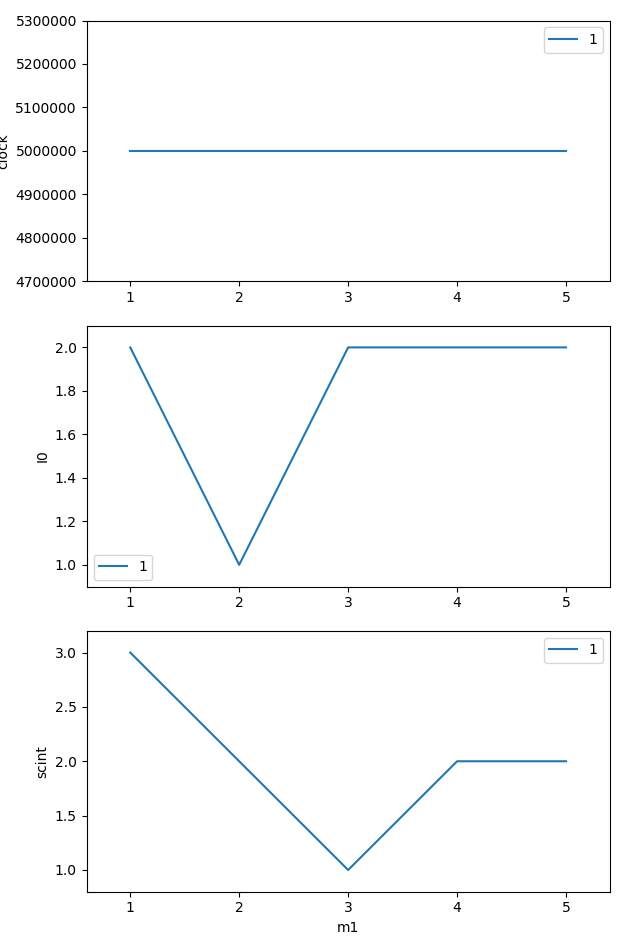

+-----------+------------+------------+------------------+------------+------------+-------------+------------+
|   seq_num |       time |         m1 | m1_user_setpoint |         I0 |      clock | scaler_time |      scint |
+-----------+------------+------------+------------------+------------+------------+-------------+------------+
|         1 | 19:47:44.5 |    1.00000 |    5000000 |          2 |          3 |
|         1 | 19:47:44.5 |    1.00000 |          1.00000 |          2 |    5000000 |       0.500 |          3 |
|         2 | 19:47:46.6 |    2.00000 |    5000000 |          1 |          2 |
|         2 | 19:47:46.6 |    2.00000 |          2.00000 |          1 |    5000000 |       0.500 |          2 |
|         3 | 19:47:48.6 |    3.00000 |    5000000 |          2 |          1 |
|         3 | 19:47:48.6 |    3.00000 |          3.00000 |          2 |    5000000 |       0.500 |          1 |
|         4 | 19:47:50.6 |    4.00000 |    5000000 |          2 |          2 |
|         4 

('22210510-faa3-4bb1-826f-d42be15ab4bc',)

In [4]:
RE(bp.scan([scaler], m1, 1, 5, 5), LiveTable([m1, scaler]))